In [ ]:
!pip install kaggle
!pip install transformers
!pip install torch
!pip install diffusers accelerate peft datasets wandb ftfy tensorboard

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
!git clone https://github.com/huggingface/diffusers
%cd /content/diffusers/examples/text_to_image

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
!mkdir /content/finetuningoutput

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d markminerov/88500-car-images


Dataset URL: https://www.kaggle.com/datasets/markminerov/88500-car-images
License(s): CC0-1.0
100% 2.90G/2.91G [02:35<00:00, 19.4MB/s]
100% 2.91G/2.91G [02:35<00:00, 20.1MB/s]


In [ ]:
!unzip 88500-car-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: out/85202.jpg           
  inflating: out/85203.jpg           
  inflating: out/85204.jpg           
  inflating: out/85205.jpg           
  inflating: out/85206.jpg           
  inflating: out/85207.jpg           
  inflating: out/85208.jpg           
  inflating: out/85209.jpg           
  inflating: out/8521.jpg            
  inflating: out/85210.jpg           
  inflating: out/85211.jpg           
  inflating: out/85212.jpg           
  inflating: out/85213.jpg           
  inflating: out/85214.jpg           
  inflating: out/85215.jpg           
  inflating: out/85216.jpg           
  inflating: out/85217.jpg           
  inflating: out/85218.jpg           
  inflating: out/85219.jpg           
  inflating: out/8522.jpg            
  inflating: out/85220.jpg           
  inflating: out/85221.jpg           
  inflating: out/85222.jpg           
  inflating: out/85223.jpg           
  inflating: out/85224.jpg           

In [ ]:
import os
from PIL import Image
dataset_dir = '/content/out'
print(os.listdir(dataset_dir)[:10])

# Load and display an image
image_path = os.path.join(dataset_dir, '1.jpg')
image = Image.open(image_path)
image.show()

['62182.jpg', '64920.jpg', '45345.jpg', '19224.jpg', '56434.jpg', '29040.jpg', '22336.jpg', '26256.jpg', '26224.jpg', '68742.jpg']


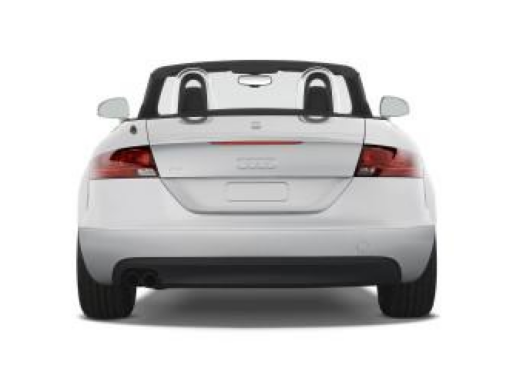

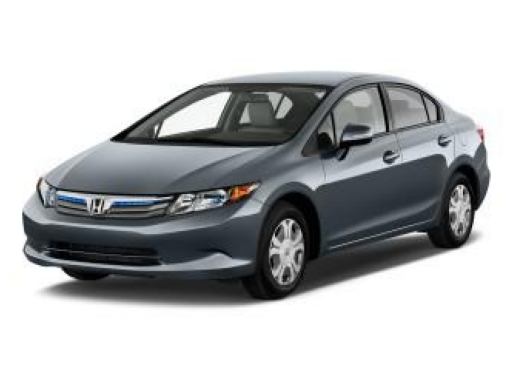

In [ ]:
import matplotlib.pyplot as plt
files = os.listdir(dataset_dir)

# Display the first 1-2 images
for file in files[:2]:
    image_path = os.path.join(dataset_dir, file)
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')  # Hide the axis
    plt.show()

In [ ]:
!pip install accelerate diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 67.7 MB/s eta 0:00:00


In [ ]:
from transformers import AutoProcessor, LlavaForConditionalGeneration

In [ ]:
# Load the model and processor
model = LlavaForConditionalGeneration.from_pretrained("llava-hf/llava-1.5-7b-hf")
processor = AutoProcessor.from_pretrained("llava-hf/llava-1.5-7b-hf")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/llava/configuration_llava.py:100: FutureWarning: The `vocab_size` argument is deprecated and will be removed in v4.42, since it can be inferred from the `text_config`. Passing this argument has no effect
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
import torch
# Move the model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

LlavaForConditionalGeneration(
  (vision_tower): CLIPVisionModel(
    (vision_model): CLIPVisionTransformer(
      (embeddings): CLIPVisionEmbeddings(
        (patch_embedding): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
        (position_embedding): Embedding(577, 1024)
      )
      (pre_layrnorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (encoder): CLIPEncoder(
        (layers): ModuleList(
          (0-23): 24 x CLIPEncoderLayer(
            (self_attn): CLIPAttention(
              (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
            )
            (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (mlp): CLIPMLP(
              (activation_fn): Quick

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
image_path = os.path.join(dataset_dir, files[15])
image = Image.open(image_path)

# Define the prompt
prompt = "USER: <image>\nDescribe what car is this including the brand, color and type. ASSISTANT:"

# Prepare inputs for the model
inputs = processor(text=prompt, images=image, return_tensors="pt")
inputs = {key: value.to(device) for key, value in inputs.items()}

# Generate the description
generate_ids = model.generate(**inputs, max_new_tokens=50)
description = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

print(description)

USER:  
Describe what car is this including the brand, color and type. ASSISTANT: The car in the image is a red Suzuki, which is a compact car.


In [ ]:
import pandas as pd
df = pd.DataFrame(files, columns=['file_name'])
sampled_df = df.sample(n=200, random_state=42).reset_index(drop=True)

In [ ]:
dataset_dir = '/content/out'

In [ ]:
import base64
import json
from io import BytesIO
def extract_assistant_message(text):
    return text.split("ASSISTANT:")[-1].strip()

results = []

for index, row in sampled_df.iterrows():
    image_path = os.path.join(dataset_dir, row['file_name'])  # Adjust the column name if necessary
    image = Image.open(image_path)

    # Encode the image as base64 string
    buffered = BytesIO()
    image.save(buffered, format="JPEG")
    encoded_image = base64.b64encode(buffered.getvalue()).decode('utf-8')

    # Generate caption for the image
    inputs = processor(text=prompt, images=image, return_tensors="pt")
    inputs = {key: value.to(device) for key, value in inputs.items()}
    generate_ids = model.generate(**inputs, max_new_tokens=50)
    full_text = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]
    description = extract_assistant_message(full_text)
    # Append the encoded image and description to the list as a dictionary
    results.append({'image': encoded_image, 'text': description})


In [ ]:
results

[{'image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCADwAUADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKK5Lx14xi8JaM0yIJb2UEQRHpn+83tQB1Lusal3YKo6knArOvPEGlWKgy3isT0WEGVj+Cgmvm658Wa/qkpvL3VIzIxyom2lY

In [ ]:
results_df = pd.DataFrame(results)

features = Features({
    'image': Value('string'),
    'text': Value('string')
})

dataset_new = Dataset.from_pandas(df, features=features)
print(dataset_new)

In [ ]:
dataset_new.push_to_hub("Vibhav99/150-sampled-car-images")

In [ ]:
# Initialize lists to store results
file_names = []
descriptions = []

for index, row in sampled_df.iterrows():
    image_path = os.path.join(dataset_dir, row['file_name'])
    image = Image.open(image_path)

    inputs = processor(text=prompt, images=image, return_tensors="pt")

    generate_ids = model.generate(**inputs, max_new_tokens=50)
    description = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

    file_names.append(row['file_name'])
    descriptions.append(description)


In [ ]:
ft_df = results_df
# Function to extract the assistant's message
def extract_assistant_message(text):
    return text.split("ASSISTANT:")[-1].strip()

# Apply the function to the 'text' column
ft_df['text'] = results_df['text'].apply(extract_assistant_message)

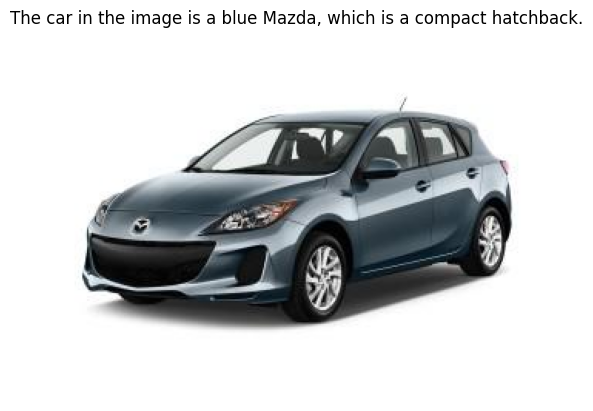

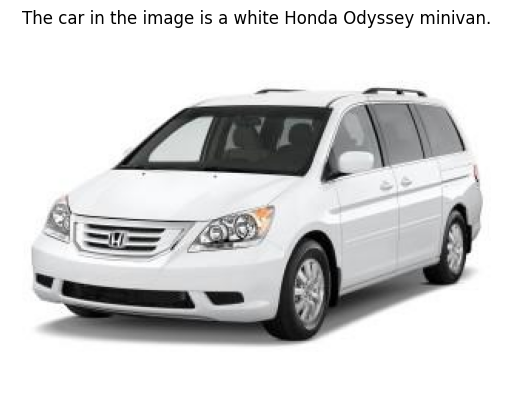

In [ ]:
# Function to display image with its description
def display_image_with_description(image_path, description):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(description)
    plt.axis('off')  # Hide the axis
    plt.show()

# Display the first 5 images with descriptions as an example
for index, row in ft_df[4:6].iterrows():
    image_path = os.path.join(dataset_dir, row['image'])
    display_image_with_description(image_path, row['text'])

In [ ]:
# Define the path to save the file in Google Drive
save_path = '/content/drive/My Drive/PixArt_FT_cars.csv'

# Save the DataFrame to the specified path
ft_df.to_csv(save_path, index=False)

print(f"Dataset with descriptions saved to '{save_path}'")

Dataset with descriptions saved to '/content/drive/My Drive/PixArt_FT_cars.csv'


Loading PixArt-alpha

In [ ]:
import torch
from diffusers import PixArtAlphaPipeline
pipe = PixArtAlphaPipeline.from_pretrained("PixArt-alpha/PixArt-XL-2-512x512", torch_dtype=torch.float16)
pipe = pipe.to("cuda")
# if using torch < 2.0
# pipe.enable_xformers_memory_efficient_attention()

model_index.json:   0%|          | 0.00/452 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

tokenizer/added_tokens.json:   0%|          | 0.00/2.59k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/907 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

(…)ext_encoder/model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

transformer/config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.87G [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/4.19G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/2.45G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
!accelerate launch --mixed_precision="fp16"  train_text_to_image_lora.py \
  --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5" \
  --dataset_name='Vibhav99/150-sampled-car-images' \
  --resolution=512 --center_crop --random_flip \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --max_train_steps=15000 \
  --learning_rate=1e-04 \
  --max_grad_norm=1 \
  --lr_scheduler="cosine" --lr_warmup_steps=0 \
  --output_dir="/content/finetuningoutput" \
  --push_to_hub \
  --report_to=wandb \
  --checkpointing_steps=500 \
  --validation_prompt="describe what car is this including the brand, color and type." \
  --seed=1337

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2024-05-29 00:55:24.427796: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-29 00:55:24.427859: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-29 00:55:24.429384: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-29 00:55:25.543968: W te

In [ ]:
dataset.save_to_disk('/content/finetuningoutput/Fine-tuning-data')

Saving the dataset (0/1 shards):   0%|          | 0/150 [00:00<?, ? examples/s]